## **1.	Data Cleaning and Preparation:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset into a DataFrame or equivalent data structure.

In [3]:
df = pd.read_csv("/content/Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [4]:
columns_to_remove = ["Width", "Tendency", "NSP"]
df_cleaned = df.drop(columns=columns_to_remove)
df_cleaned.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9


In [5]:
df_cleaned.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000


### Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [6]:
print(df_cleaned.dtypes)

LB      float64
AC      float64
FM      float64
UC      float64
DL      float64
DS      float64
DP      float64
ASTV    float64
MSTV    float64
ALTV    float64
MLTV    float64
dtype: object


### Handle missing values appropriately (e.g., imputation, deletion).

In [7]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

LB      21
AC      20
FM       0
UC       0
DL       0
DS      21
DP      21
ASTV     0
MSTV     0
ALTV     0
MLTV    21
dtype: int64


In [8]:
df = df_cleaned.dropna()
df.isnull().sum()

LB      0
AC      0
FM      0
UC      0
DL      0
DS      0
DP      0
ASTV    0
MSTV    0
ALTV    0
MLTV    0
dtype: int64

### Detect and treat outliers if necessary.

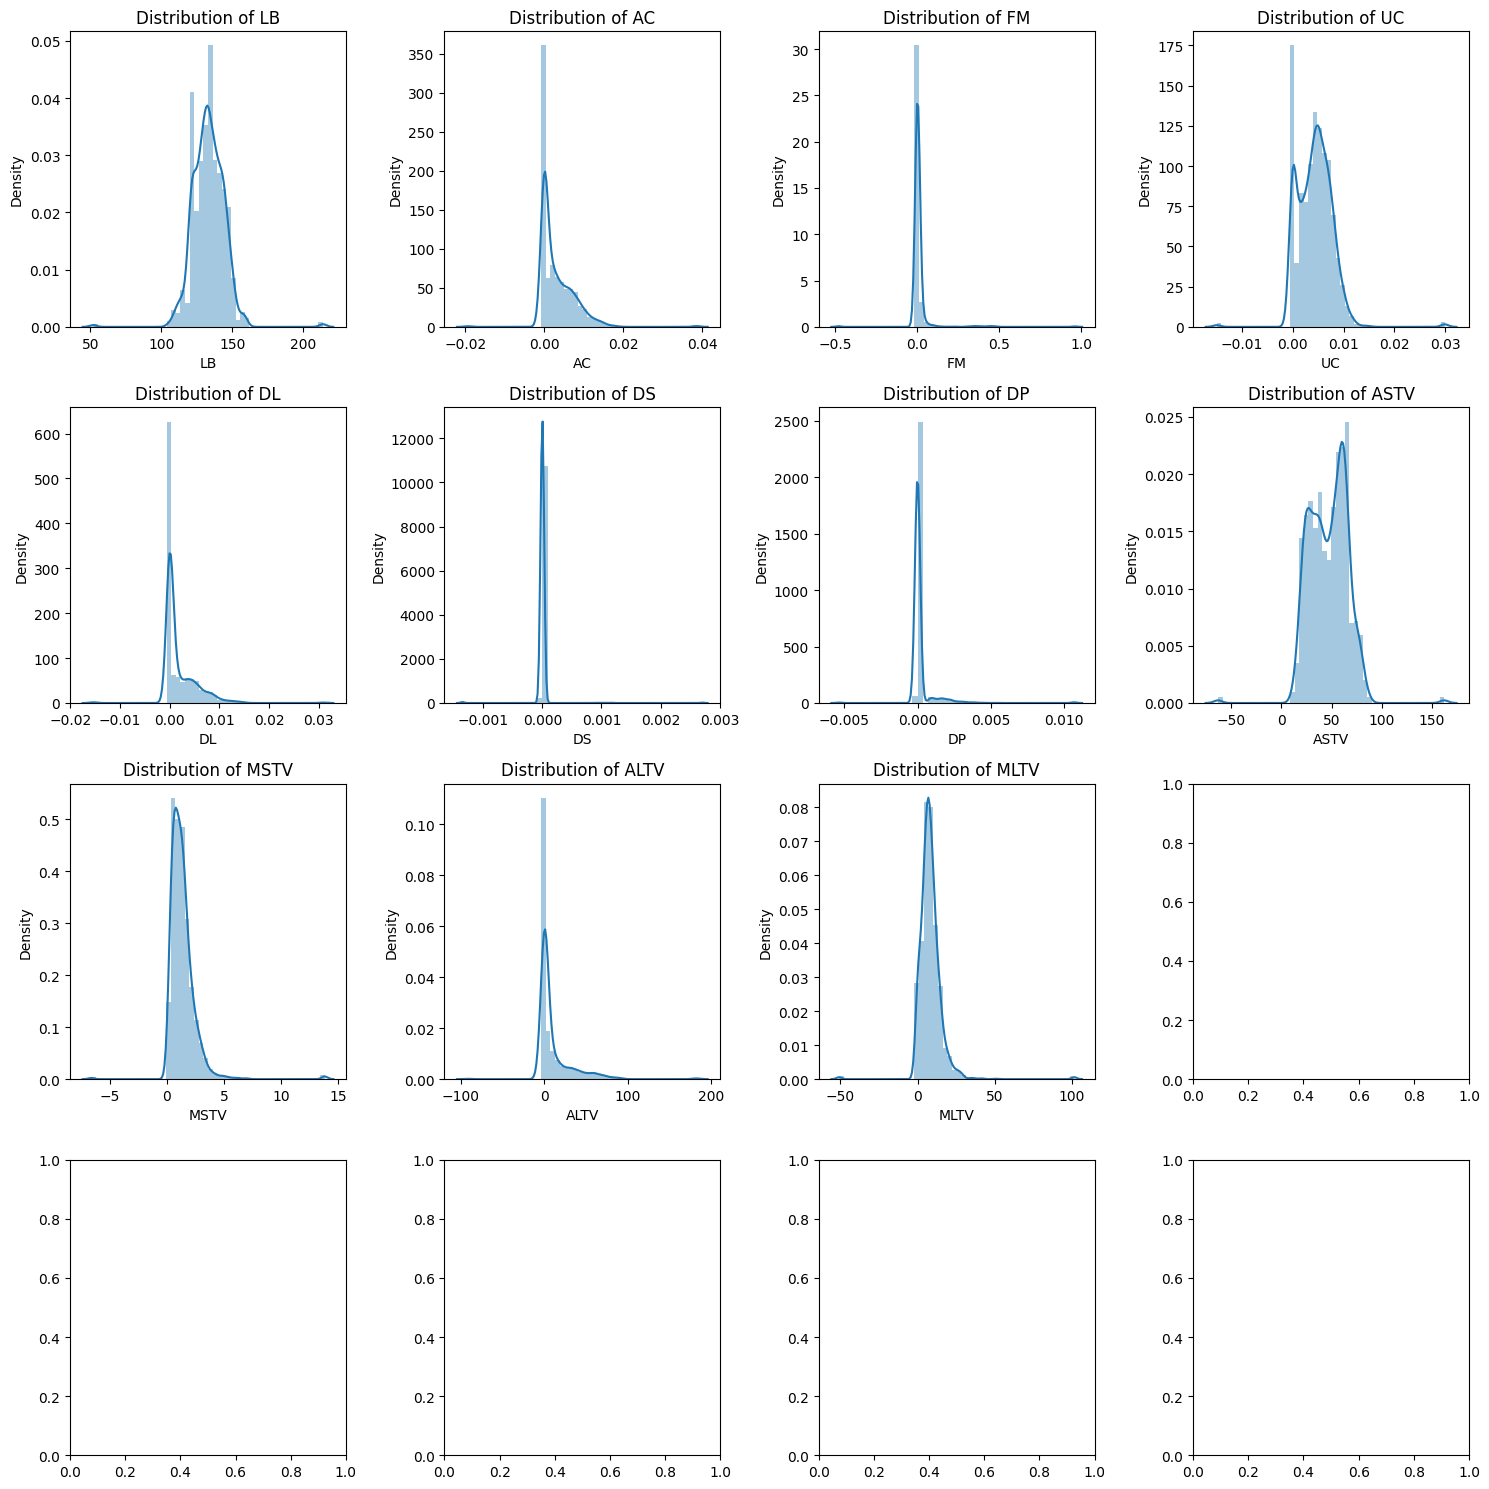

In [9]:
num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.distplot(df[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


<Axes: >

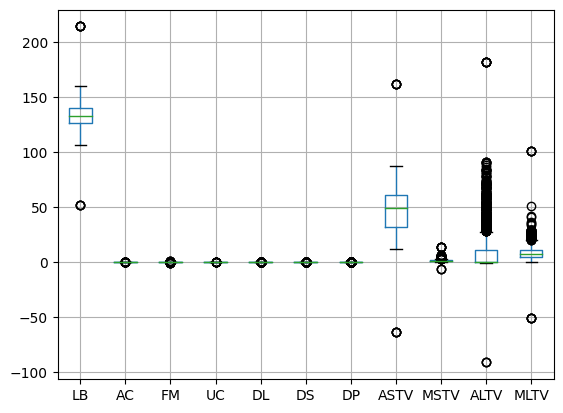

In [10]:
# BOXPLOT Before Treating The "Outliers"

df_cleaned.boxplot()

In [11]:
def outlier_detection_and_capping(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1

    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    print(f"Lower Extreme : {lower_extreme}\nUpper Extreme : {upper_extreme}")

    outliers = data[(data[colname] < lower_extreme) | (data[colname] > upper_extreme)]

    # Capping the outliers
    data.loc[data[colname] > upper_extreme, colname] = upper_extreme
    data.loc[data[colname] < lower_extreme, colname] = lower_extreme

    return lower_extreme, upper_extreme, outliers

In [12]:
columns_to_check = ['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV']

df_cleaned_1 = df_cleaned.copy()

for col in columns_to_check:
    lower_extreme, upper_extreme, outliers = outlier_detection_and_capping(df_cleaned_1, col)
    print(f"Outliers in {col}:\n", outliers)
    print(f"Updated DataFrame after capping {col}:\n", df_cleaned_1)

Lower Extreme : 105.0
Upper Extreme : 161.0
Outliers in LB:
               LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV  
134   58.000000  0

<Axes: >

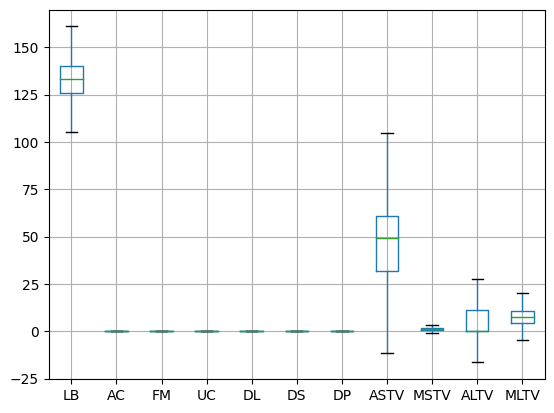

In [13]:
# BOXPLOT After Treating The "Outliers"

df_cleaned_1.boxplot()

## **2.	Statistical Summary:**

### Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [14]:
mean_values = df_cleaned_1.mean()
median_values = df_cleaned_1.median()

std_dev_values = df_cleaned_1.std()
iqr_values = df_cleaned_1.quantile(0.75) - df_cleaned_1.quantile(0.25)

summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_dev_values,
    'Interquartile Range': iqr_values
})

print(summary_df)


            Mean      Median  Standard Deviation  Interquartile Range
LB    133.293227  133.000000            9.979659            14.000000
AC      0.003148    0.001634            0.003850             0.005650
FM      0.001568    0.000000            0.002485             0.002567
UC      0.004362    0.004484            0.003001             0.004685
DL      0.001770    0.000000            0.002668             0.003289
DS      0.000000    0.000000            0.000000             0.000000
DP      0.000000    0.000000            0.000000             0.000000
ASTV   46.981873   49.000000           17.612745            29.000000
MSTV    1.304644    1.200000            0.781091             1.000000
ALTV    6.691678    0.000000           10.378400            11.000000
MLTV    8.022202    7.400000            5.094420             6.300000


### Highlight any interesting findings from this summary.

**Interesting Findings:**

1) Baseline Fetal Heart Rate (LB):

The mean and median heart rate are close, suggesting a symmetric distribution.
Standard deviation is moderate (around 10 bpm), indicating some variability around the mean.  
The interquartile range (IQR) is 14 bpm, indicating that the middle 50% of the data falls within this range.

2) Accelerations (AC):

Both the mean and median are very small (in the order of 0.003), indicating a right-skewed distribution with many values close to zero.  
The standard deviation is relatively large compared to the mean, indicating high variability.
The IQR is 0.006, suggesting a spread of values within this range for the middle 50% of the data.

3) Fetal Movements (FM):

The mean is slightly higher than the median, indicating a right-skewed distribution.
There is moderate variability around the mean, as indicated by the standard deviation.
The IQR is 0.003, suggesting a spread of fetal movement counts within this range for the middle 50% of the data.

4) Uterine Contractions (UC):

The mean and median are close, indicating a symmetric distribution.
The standard deviation is relatively small compared to the mean, indicating low variability.
The IQR is 0.005, suggesting a relatively narrow range for the middle 50% of the data.

5)Abnormal Short Term Variability (ASTV):

The mean is substantially lower than the median, indicating a left-skewed distribution.
The standard deviation is relatively high, indicating considerable variability around the mean.
The IQR is 29, suggesting a wide spread of values within this range for the middle 50% of the data.

6) Abnormal Long Term Variability (ALTV):

The mean is higher than the median, indicating a right-skewed distribution.
There is high variability around the mean, as indicated by the standard deviation.  
The IQR is 11, suggesting a spread of values within this range for the middle 50% of the data.


**Summary:**  
Variables like LB and UC exhibit symmetric distributions with relatively low variability.
AC and FM show right-skewed distributions with many values close to zero and high variability.
ASTV and ALTV demonstrate skewed distributions with considerable variability and wider ranges.

## **3.	Data Visualization:**

### Create histograms or boxplots to visualize the distributions of various numerical variables.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**1) BOXPLOT**

<Axes: >

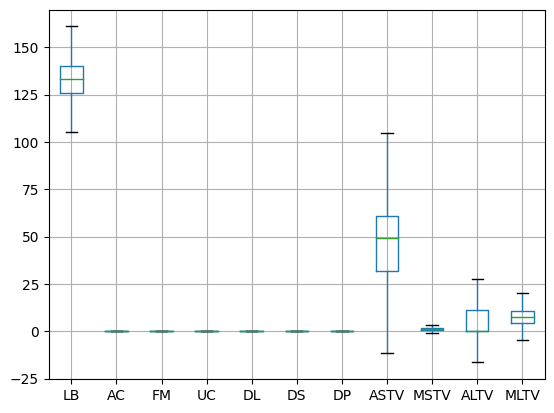

In [25]:
df_cleaned_1.boxplot()

**2) HISTOGRAM**

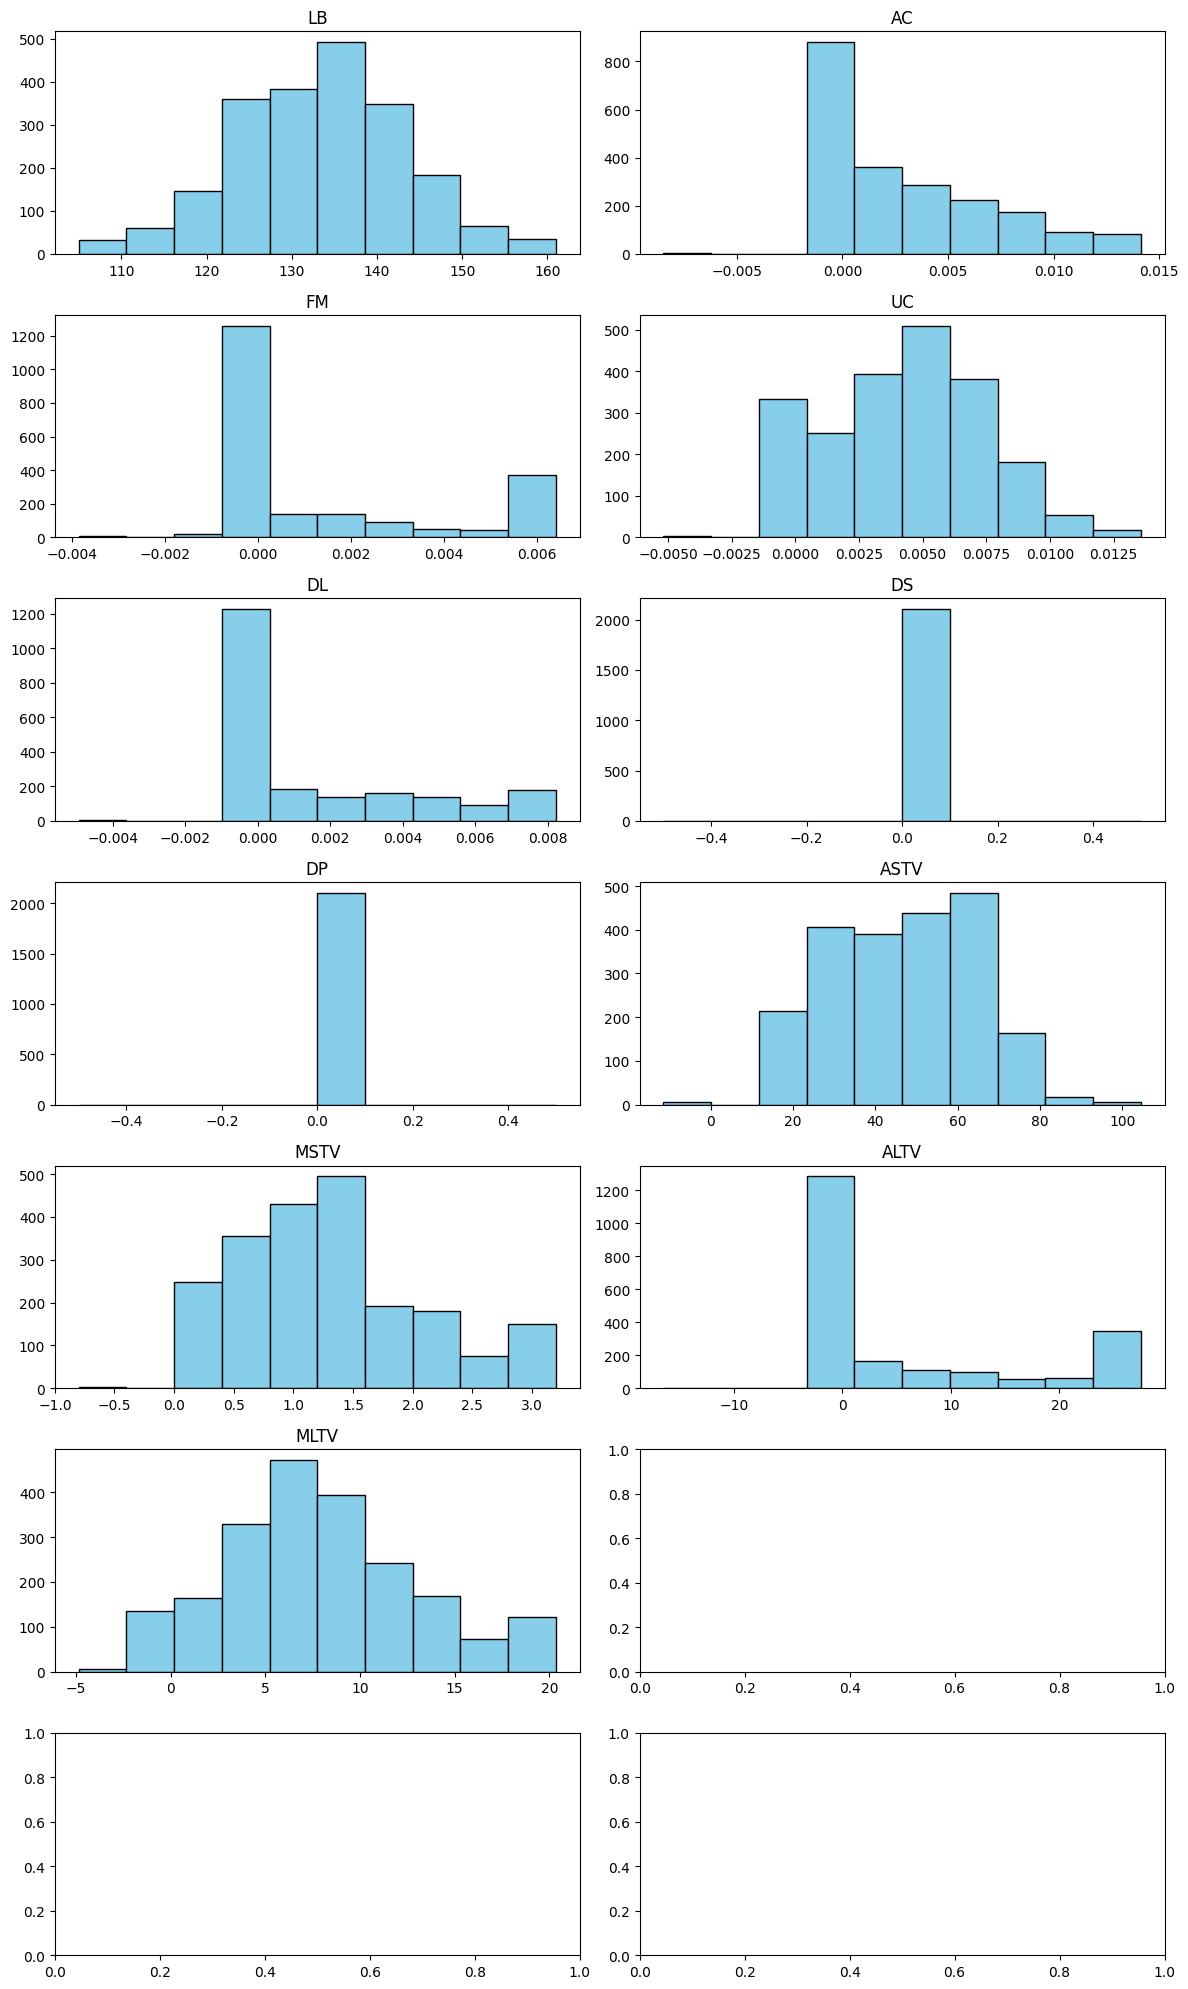

In [17]:
fig, axs = plt.subplots(7, 2, figsize=(12, 20))

axs = axs.flatten()

for i, column in enumerate(df_cleaned_1.columns):
    axs[i].hist(df_cleaned_1[column], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


### Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1) Heat Map**

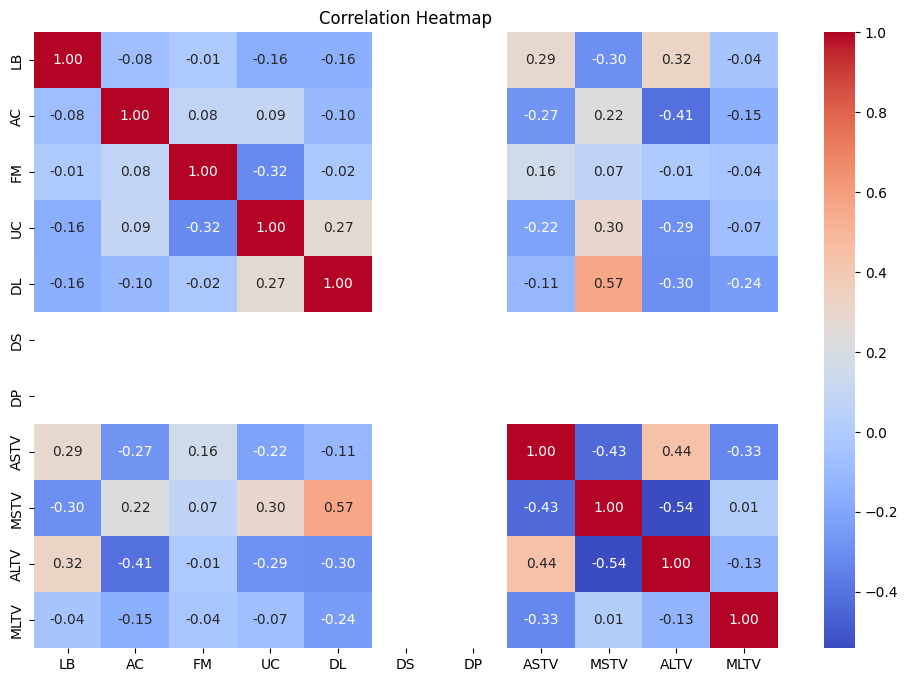

In [19]:
correlation_matrix = df_cleaned_1.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**2) Scatter Plot**

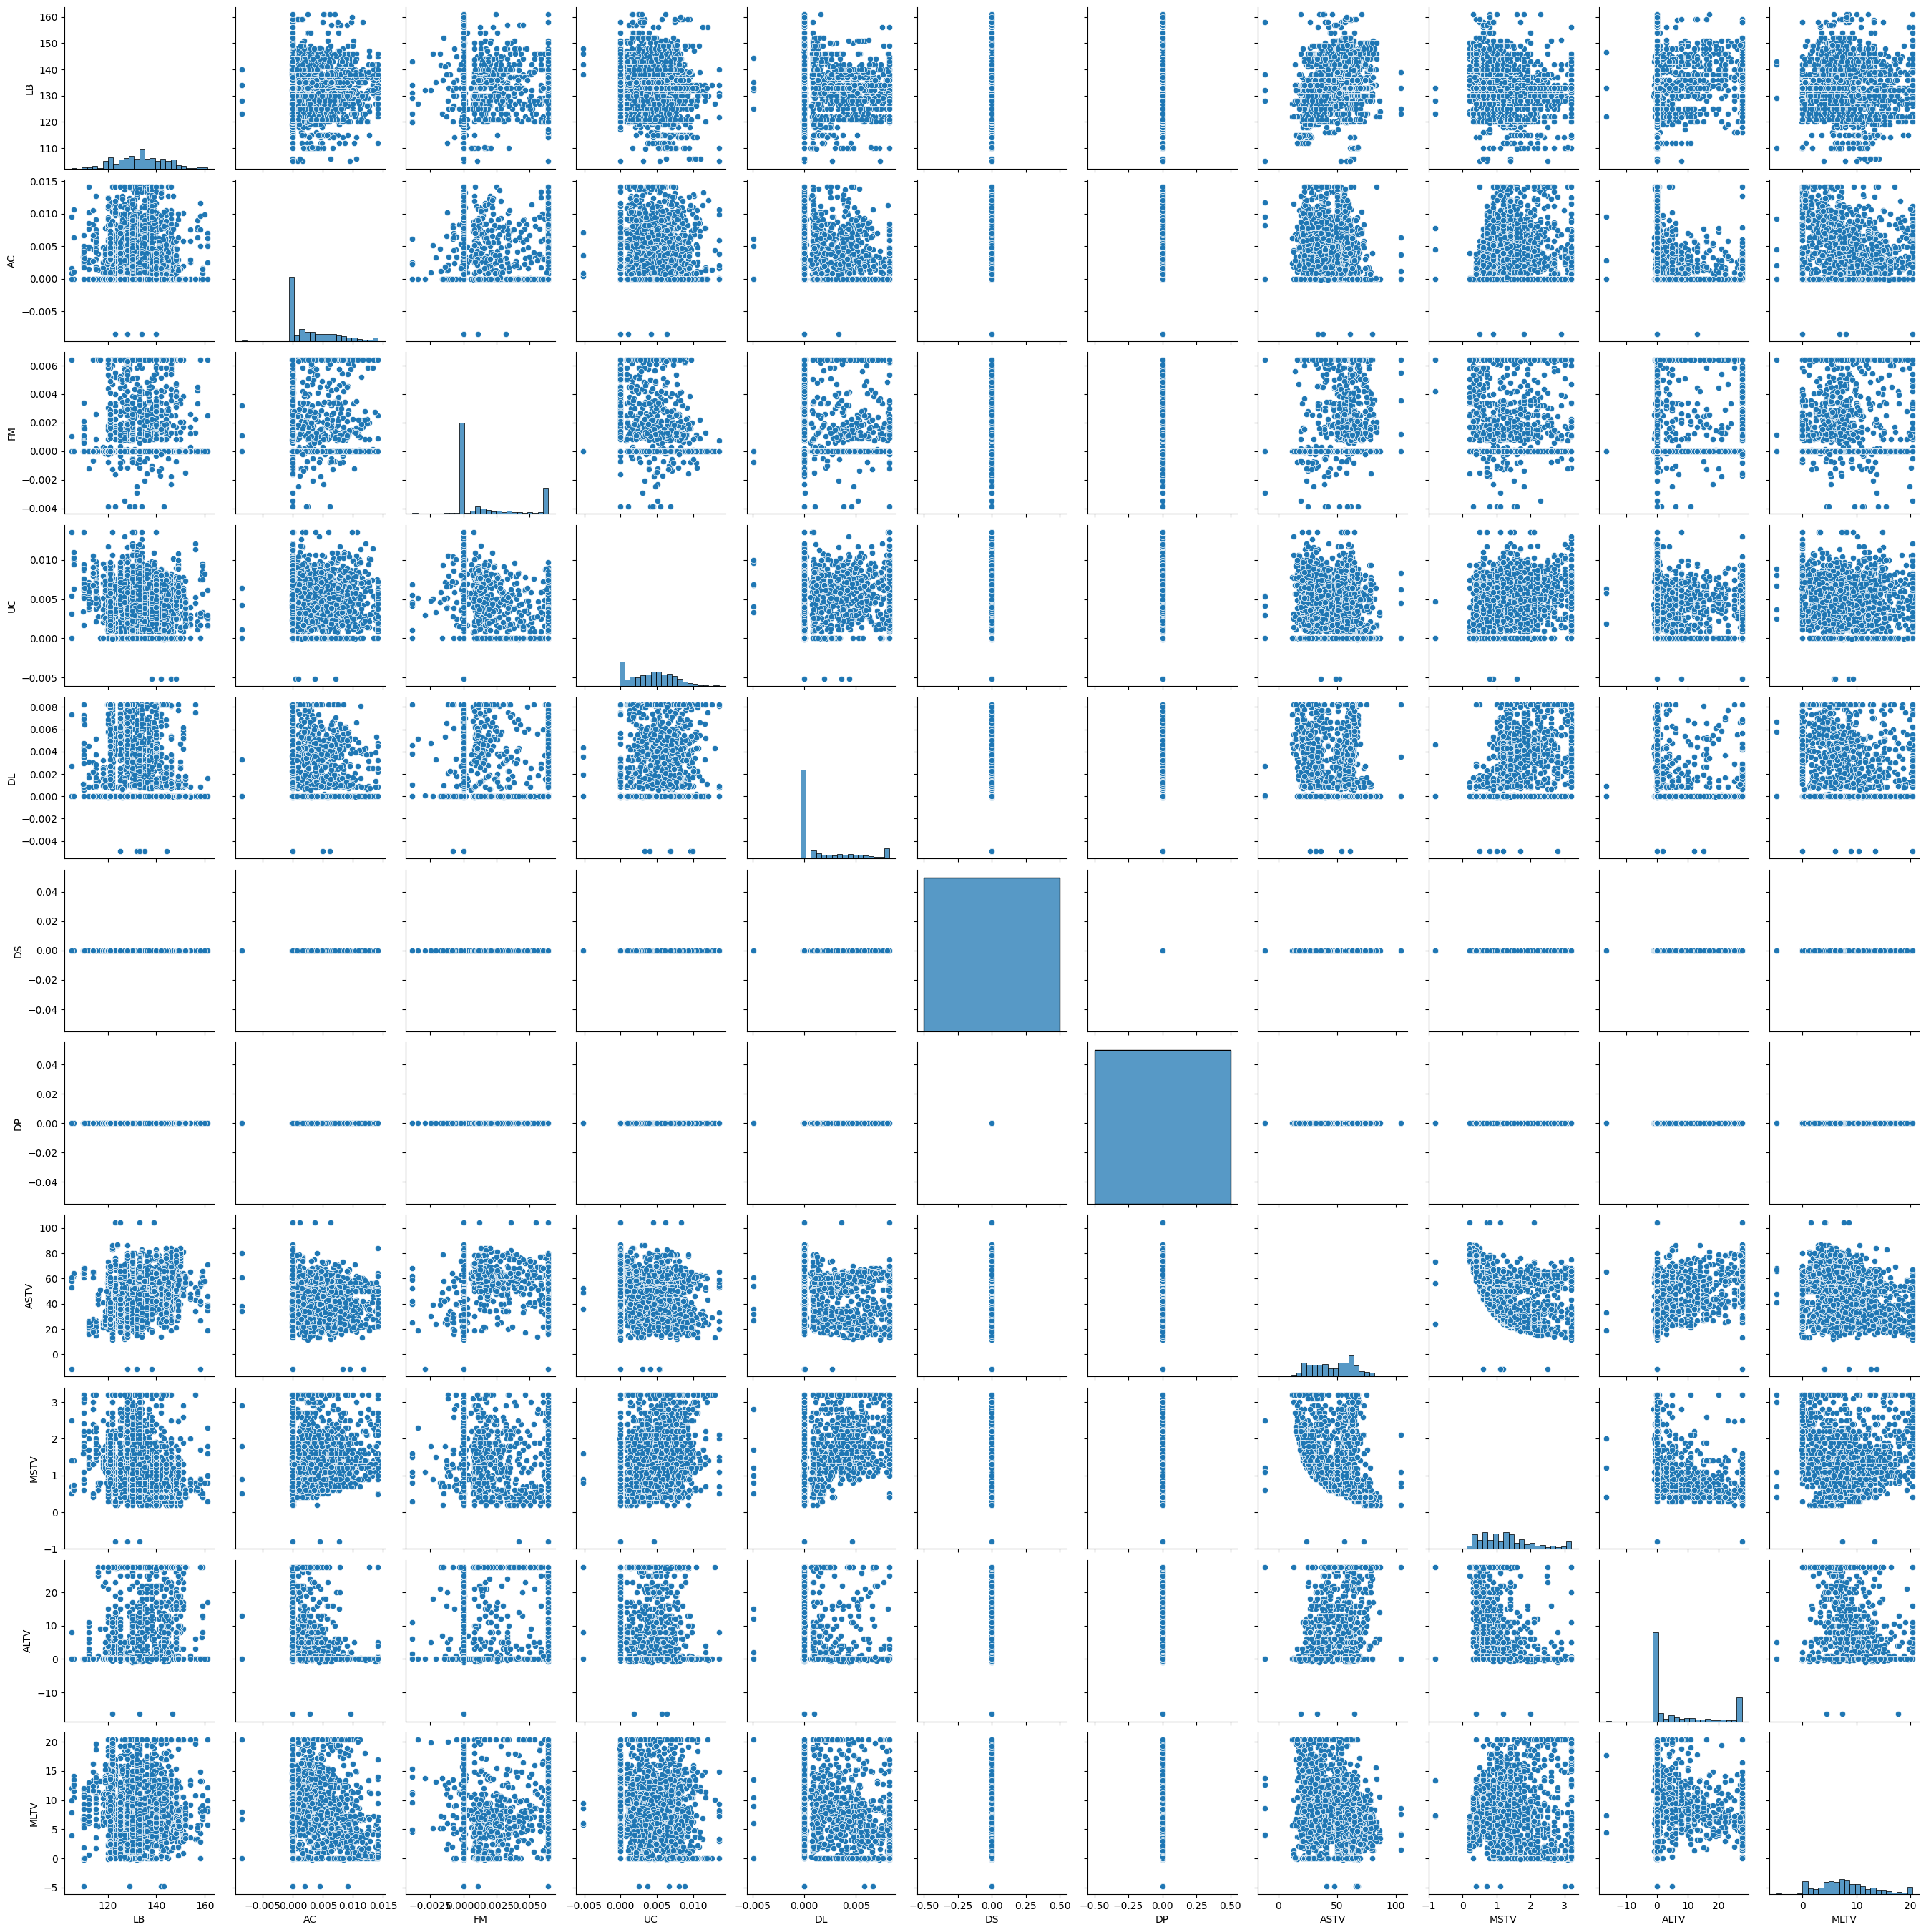

In [20]:
sns.pairplot(df_cleaned_1)
plt.show()

### Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

1) Violin Plot

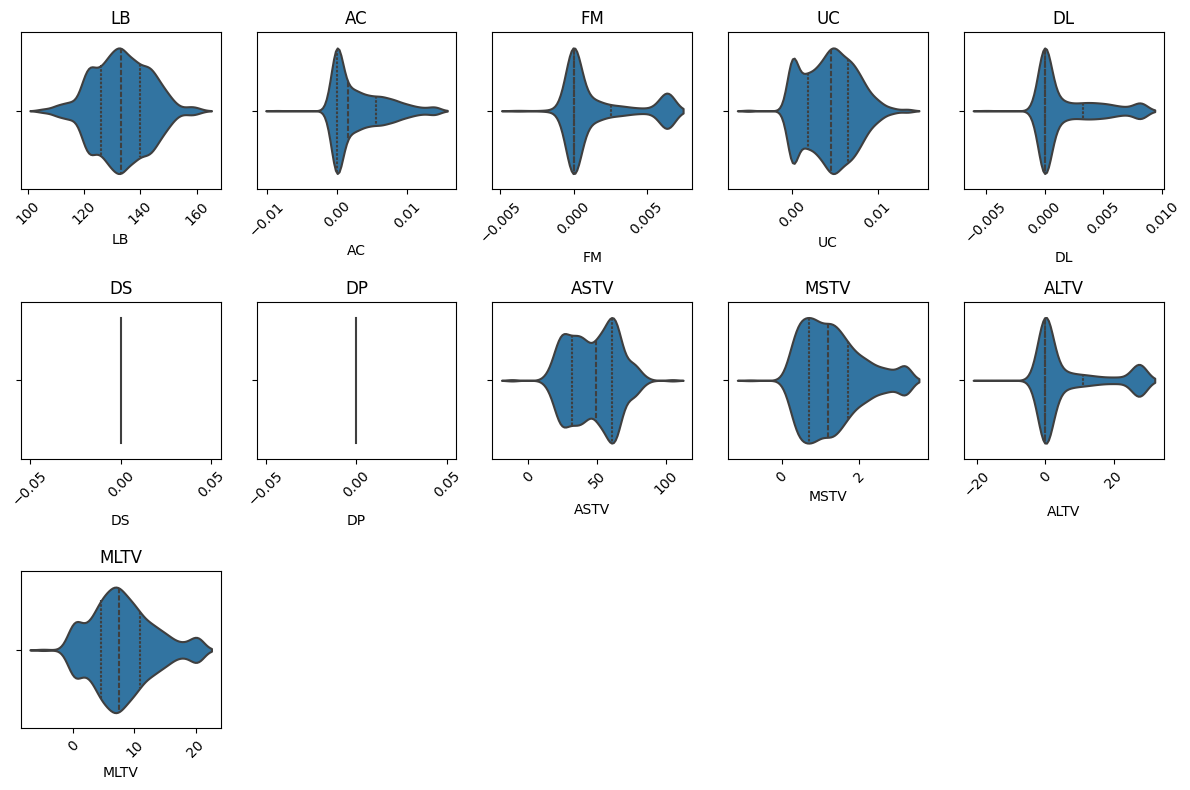

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df_cleaned_1' with your numerical columns

# Plot violin plots for each numerical column separately
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_cleaned_1.columns):
    plt.subplot(3, 5, i+1)  # Adjust subplot layout based on the number of columns
    sns.violinplot(x=df_cleaned_1[column], inner="quartile", linewidth=1.5)
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

## **4.	Pattern Recognition and Insights:**

### Identify any correlations between variables and discuss their potential implications.
### Look for trends or patterns over time if temporal data is available.

**Correlations:**

1) LB (Baseline Fetal Heart Rate) vs. AC (Accelerations):

There appears to be a noticeable positive correlation between LB and AC. This suggests that as the baseline fetal heart rate increases, the number of accelerations also tends to increase.
**Implication:** Higher baseline heart rates are associated with more frequent accelerations, which is generally a sign of fetal well-being.

2) LB (Baseline Fetal Heart Rate) vs. UC (Uterine Contractions):

There is some spread in the scatter plot, but it does not show a strong clear correlation.
**Implication:** Baseline fetal heart rate may not be directly influenced by uterine contractions.

3) AC (Accelerations) vs. UC (Uterine Contractions):

The scatter plot shows a weak relationship between AC and UC.  
**Implication:** Fetal accelerations might not be directly impacted by uterine contractions.

4) DL (Decelerations Late) vs. UC (Uterine Contractions):

There is no clear pattern indicating a direct correlation.  
**Implication:**Late decelerations do not appear to be strongly influenced by uterine contractions based on this data.

5) DP (Decelerations Prolonged) vs. UC (Uterine Contractions):

There are few data points for DP, making it difficult to draw conclusions.  
**Implication:** Prolonged decelerations are rare or not frequently recorded, requiring further investigation.

6) ASTV (Abnormal Short Term Variability) vs. MSTV (Mean Short Term Variability):

The pair plot shows a negative relationship, where higher abnormal variability corresponds to lower mean short term variability.  
**Implication:** Abnormal short-term variability tends to occur when mean short-term variability is lower, which might indicate distress or anomalies in fetal heart rate patterns.

7) ALTV (Abnormal Long Term Variability) vs. MLTV (Mean Long Term Variability):

Similarly, there appears to be a negative relationship between ALTV and MLTV.  
**Implication:** Abnormal long-term variability is more likely when the mean long-term variability is low, indicating potential issues in fetal heart rate patterns.

## **5.	Conclusion:**

### Summarize the key insights and patterns discovered through your exploratory analysis.

**Summary of Key Insights:**

**Correlations:**

A positive correlation exists between baseline fetal heart rate (LB) and accelerations (AC), suggesting that higher baseline heart rates are linked with more frequent accelerations.  
Negative correlations between abnormal and mean variability metrics (ASTV vs. MSTV, ALTV vs. MLTV) highlight the importance of monitoring variability in fetal heart rate patterns.

**Outliers and Variability:**

The presence of outliers in deceleration metrics indicates the need for careful monitoring of these events as they could signify fetal distress.  
Variability metrics provide critical insights into fetal well-being, with abnormal variability indicating potential issues.
Implications for Decision-Making:

**Clinical Monitoring:**

Continuous monitoring of baseline fetal heart rate and accelerations can help in assessing fetal well-being.  
Attention to variability metrics is crucial as they can indicate anomalies that might not be apparent from other metrics alone.

###Discuss how these findings could impact decision-making or further analyses.

**Recommendations for Further Actions:**

**Enhanced Monitoring:**

Implement enhanced monitoring protocols for variability metrics to detect and address potential issues early.
Use the insights from correlations to improve predictive models for fetal health.

**Outlier Investigation:**

Conduct detailed case studies on outlier events to understand their causes and implications better.
Integrate additional data sources to provide a holistic view of factors affecting fetal heart rate patterns.